# DESAFIO MODELO PROPERATTI

In [7]:
import Util as utl
import pandas as pd
import numpy as np

#### SE PONEN NULLABLE LOS OUTLIERS Y SON IMPUTADOS   .......... z-score  [0.045]

In [8]:
data = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/properatti.csv')
data = utl.limpiarDatos(data,0.85)
#data = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/data.csv',sep='|')
#data.to_csv('/home/DS-DH/notebooks/digitalHouse/data.csv',sep='|')


/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:497: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.ambientesImputados = ImputarAmbientesProceso(data,10)


In [9]:
matriz = utl.GenerarMatriz(data)

#### SE GENERAN LAS DUMMYS PARA EL MODELO

In [35]:
modeloMatriz = utl.generarDummies(matriz)
#modeloMatriz=modeloMatriz[(modeloMatriz.superficie_total>20) & (modeloMatriz.superficie_total<150)]
#modeloMatriz=modeloMatriz[(modeloMatriz.precio_m2>20) & (modeloMatriz.precio_m2<8000)]
#modeloMatriz.describe()

In [37]:
modeloMatriz.describe()
modeloMatriz.shape
#modeloMatriz.precio_m2 = pd.qcut(modeloMatriz.precio_m2,25).apply(lambda x: x.mid.round(-2).astype(int))

(10740, 77)

### Regresion Lineal Multiple

/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:152: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:154: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


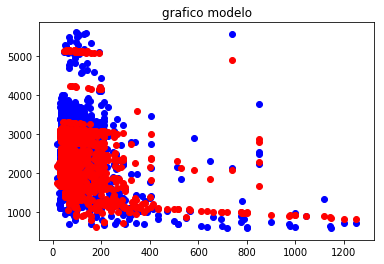

CROSS VALIDATION: 0.8163496867020639 0.819153983171037 0.8155782998579348 0.8232603887628364 0.8166281617769522
MAE: 251.7318454153644
MSE: 98899.49799074566
RMSE: 314.4829057210354
EL R2 TRAIN ES DE:  0.8215258374744123
EL R2 TEST ES DE:  0.8162065002143842


In [38]:
modelo = utl.modelo_regresion_lineal(modeloMatriz)

#### Regresion Ridge

,precio_m2,superficie_total,superficieJardines,superficieTerrazas,superficieJardinesTerrazas,1_AMBIENTE,2_AMBIENTE,3_AMBIENTE,4_AMBIENTE,5_AMBIENTE,...,villa_santa_rita,versalles,villa_ortuzar,parque_chacabuco,villa_lugano,villa_soldati,villa_real,chacarita,villa_riachuelo,pompeya
0,1127.272727,139.474227,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3066.666667,45.000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3000.000000,65.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3521.428571,42.000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1707.142857,140.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19,3365.384615,104.000000,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1744.186047,43.000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1812.500000,209.632500,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
48,1702.127660,208.482063,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
52,2200.000000,50.000000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:59: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:60: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


REGULARIZACION CON RIDGE
CROSS VALIDATION: 0.8399910068334089 0.8477535142570454 0.8379545651258202 0.8498221629760021 0.8128129260570038
MAE RIDGE: 225.69140627235004
MSE RIDGE: 80202.50244308489
RMSE RIDGE: 283.20046335252505
RIDGE -> R2 TRAIN:  0.8432313483402428
RIDGE -> R2 TEST:  0.8463931810570733


(2176.323651774843,
 array([ 1.02531347e-01, -2.39927229e+01,  2.29163358e+00,  4.35501041e+00,
        -1.77424666e+01, -1.33174785e+01, -3.40682257e+01, -4.91397067e+01,
        -3.62815210e+01, -2.74306281e+01, -1.26625888e+01, -3.87741268e+02,
        -2.33638489e+02,  3.43653722e+02, -7.00021390e+02,  4.98960791e+02,
         6.47938827e+01,  5.86564406e+02, -4.54382597e+02, -6.98599928e+02,
        -5.88622326e+02, -7.68647143e+01,  4.44334864e+02, -3.01709705e+02,
        -5.19406147e+02, -4.93112509e+02,  8.10313227e+02,  6.06583342e+02,
         2.52960231e+03,  3.41016773e+00,  3.27310042e+02, -4.93880752e+01,
        -1.30590613e+02, -2.29638360e+02,  6.48463257e+01, -2.60954714e+02,
        -4.62509248e+02, -1.37549047e+02, -8.28528994e+02, -5.50156183e+02,
        -4.02213727e+02, -4.65686855e+02,  2.55798713e+02, -2.26428064e+02,
         3.91233781e+01, -3.51153008e+02, -3.46943742e+02, -7.12082562e+02,
        -5.36791672e+02, -4.24662213e+02,  6.46372060e+01, -8.091609

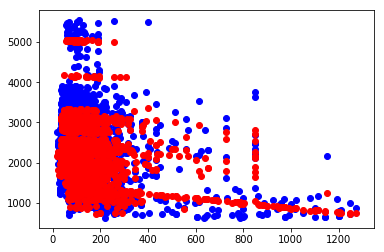

In [14]:
modelo_ridge = utl.modelo_ridge_cross_validation(modeloMatriz)
(modelo_ridge.intercept_,modelo_ridge.coef_)

#### Lasso Regression

/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


LASSO REGRESSION
CROSS VALIDATION: 0.8205193616796373 0.8455694678358532 0.8265857575229545 0.8337610519651004 0.8356975285227846
MAE LASSO: 229.54203071944545
MSE LASSO: 80388.9125562602
RMSE LASSO: 283.5293857014828
LASSO -> R2 TRAIN:  0.8383745990568435
LASSO -> R2 TEST:  0.8526827969999545


(1642.830995086285,
 array([ 5.67488064e-02, -2.27849201e+01,  0.00000000e+00,  8.46957316e+00,
        -9.30057207e+00, -1.30586003e+01, -2.57864987e+01, -1.95049370e+01,
        -6.52045884e+01,  1.88132504e-01,  0.00000000e+00, -1.46476869e+02,
        -0.00000000e+00,  6.05566945e+02, -4.57432750e+02,  7.67362210e+02,
         6.79164186e+01,  8.57637538e+02, -1.91101414e+02, -4.84623483e+02,
        -3.22982852e+02,  1.88320380e+02,  6.82935432e+02, -4.47947893e+01,
        -2.70142291e+02, -2.06109828e+02,  1.04358549e+03,  8.75180827e+02,
         2.80519315e+03,  2.51005114e+02,  6.01483054e+02, -4.92686124e+01,
         1.53092055e+02,  4.58013457e+01,  3.34139378e+02,  0.00000000e+00,
        -1.88477679e+02, -1.33594753e+02, -5.32906092e+02, -2.73501339e+02,
        -1.51581602e+02, -1.39588028e+02,  4.71521923e+02,  1.12412808e+02,
         2.83100302e+02, -8.39501251e+01, -0.00000000e+00, -3.87839627e+02,
        -2.23789122e+02, -2.42469535e+02,  3.44752841e+02, -3.888920

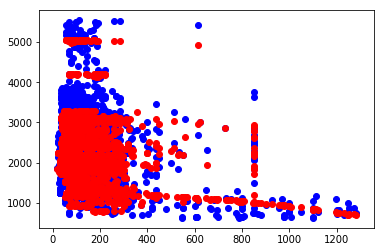

In [15]:
modelo_lasso = utl.modelo_lasso_cross_validation(modeloMatriz)
(modelo_lasso.intercept_,modelo_lasso.coef_)

## PARAMETROS A PREDECIR
###### PARA LA PREDICCION DE PRECIOS POR M2 DE ALQUILERES EN CAPITAL FEDERAL
## NORMALIZAR O NO.. DEPENDE EL MODELO A USAR

In [50]:
SUPERFICIE_TOTAL = 150           ##  [0,600]
JARDIN = '0'                      ##  0,1
TERRAZA = '1'                     ##  0,1
CANTIDAD_DE_AMBIENTES = '2'       ##  1,2,3,4,4,5,6,7
TIPO_DE_PROPIEDAD = 'CASA'        ##  CASA, PH, DTO
BARRIO = 'flores'               ##  barrios de CABA, en minusculas

nuevos_Feactures = utl.nuevosDatos(modeloMatriz, SUPERFICIE_TOTAL, JARDIN, TERRAZA, CANTIDAD_DE_AMBIENTES, TIPO_DE_PROPIEDAD, BARRIO)
y_predict = modelo_lasso.predict(nuevos_Feactures)

'EL RESULTADO DEL MODELO PARA LAS VARIABLES INGRESADAS ES DE {} U$D POR M2'.format(y_predict[0].astype(int))


/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:336: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  predecir_data.superficie_total_2 = predecir_data.superficie_total**2


'EL RESULTADO DEL MODELO PARA LAS VARIABLES INGRESADAS ES DE 2400 U$D POR M2'